<a href="https://colab.research.google.com/github/ptkoo/machineLearningJourney/blob/main/1_Linear_Regression_Assignment_(_Paing_Thet_Ko_65011416_RAI_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# **Linear Regression Assignment**


## Part 1: Linear regression with 1 feature

# One Independent variable x

1. Prepare your data samples. This is a simulated your sample data.

In [ ]:
# Sample data
X = [1, 2, 3, 4, 5]
y = [2, 3, 4, 5, 6]

2. Generate a randomized theta ranged between +1 and -1. We use random seed to ensure that the random results are the same everytime for all students. <font color='red'> Complete the generateRandomNumber() function and verify the results. </font>

In [ ]:
def generateRandomNumber(randomSeed):
  random.seed(randomSeed)
  # Generate two random numbers by using random.random() and scale theta to be between -1 and + 1
  theta0 = random.uniform(-1, 1)
  theta1 = random.uniform(-1, 1)
  return [theta0, theta1]

In [ ]:
generateRandomNumber(42)

[0.2788535969157675, -0.9499784895546661]

In [ ]:
assert generateRandomNumber(42) == [0.2788535969157675, -0.9499784895546661]

3. Make thee prediction. You will have to write the prediction and verify that you have the correct results. <font color='red'> Complete the prediction() function and verify the results. </font>

In [ ]:
def prediction(theta0, theta1, X):
  h = []
  for x in X:
    hypothesis = theta0 + theta1 * x
    h.append(hypothesis)
  return h

In [ ]:
theta0, theta1 = generateRandomNumber(42)
print(theta0, theta1)
h = prediction(theta0, theta1, X)

0.2788535969157675 -0.9499784895546661


In [ ]:
assert prediction(theta0, theta1, X) == [-0.6711248926388986, -1.6211033821935648, -2.5710818717482313, -3.5210603613028972, -4.471038850857563]

4. Calculate the loss of your. Write the loss function. <font color='red'> Complete the mseLoss() function and verify the results. </font>

In [ ]:
def mseLoss(h, y):
  loss = np.mean(np.square(np.subtract(h,y)))/2
  return loss

In [ ]:
h = prediction(theta0, theta1, X)
assert mseLoss(h,y) == 25.391974592335018

5. Calculate the gradients. <font color='red'> Complete the gradients() function and verify the results. </font>

In [ ]:
def gradients(h,y,X):
  dTheta0 = np.mean(np.subtract(h,y))
  dTheta1 = np.mean(np.subtract(h,y)*X)
  return [dTheta0, dTheta1]

In [ ]:
gradients(h,y,X)

[-6.571081871748231, -23.61320259435403]

In [ ]:
assert gradients(h,y,X) == [-6.571081871748231, -23.61320259435403]

6. Do gradient descent. Update theta using the gradients. <font color='red'> Complete the updateTheta() function and verify the results. </font>

In [ ]:
def updateTheta(theta0, theta1, dTheta0, dTheta1, alpha):
  theta0 = theta0 - alpha* dTheta0
  theta1 = theta1 - alpha* dTheta1

  return [ theta0, theta1 ]

In [ ]:
dTheta0, dTheta1 = gradients(h,y,X)
assert updateTheta(theta0, theta1, dTheta0, dTheta1, 0.01) == [0.3445644156332498, -0.7138464636111258]

7. Putting it all together. <font color='red'> Complete the linearRegression2Param() function and verify the results. </font>

In [ ]:
def linearRegression2Param(X, y, iterations, theta0, theta1):
  for _ in range(iterations):
    h = prediction(theta0, theta1, X)
    loss = mseLoss(h, y)
    dTheta0, dTheta1 = gradients(h,y,X)
    theta0, theta1 = updateTheta(theta0, theta1 , dTheta0, dTheta1, 0.01)
  return [loss, theta0, theta1]


In [ ]:
assert np.allclose( linearRegression2Param(X,y,10, theta0, theta1) , [2.6348429861046845, 0.6776876875123693, 0.47897400353967345])

8. Check the result by plotting. Try playing around with the number of iterations and see how the plot changes.

In [ ]:
def plotResult(X,y,theta1, theta0):
  # Plotting the data points
  plt.scatter(X, y, color='blue', label='Data Points')

  # Plotting the line of best fit
  predicted_y = prediction(theta0, theta1, X)

  plt.plot(X, predicted_y, color='red', label='Line of Best Fit')

  plt.xlabel('X')
  plt.ylabel('y')
  plt.title('Linear Regression with Gradient Descent')
  plt.legend()
  plt.show()

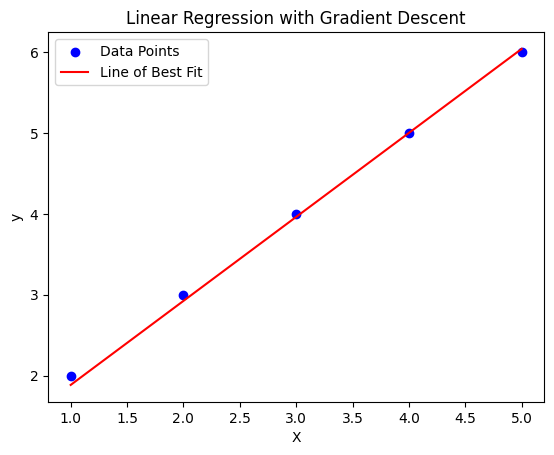

In [ ]:
loss, theta0, theta1 = linearRegression2Param(X, y, 50, theta0, theta1)
plotResult(X,y,theta1, theta0)

## Part 2: Linear regression with Multiple Features using Matrices and Linear Algebra

1. Generate random sample for X. Here we form X as a normal distribution centered around a mean. x0 has std = 1, x2 has std =1 and x3 has std=1.

In [ ]:
num_samples = 10

mean_vector = [2, 1, 3]  # Example values, adjust as needed

# Covariance matrix for 3 dimensions
covariance_matrix = [[1, 0.75, 0.5],  # Adjust these values as needed
                     [0.75, 1, 0.25],
                     [0.5, 0.25, 1]]

np.random.seed(42)
x_0 = np.random.multivariate_normal(mean_vector, covariance_matrix, num_samples)

X = np.hstack((np.ones((num_samples, 1)), x_0))
X

targetTheta = [1.5, 2, 3, -1]
y = np.matmul(X, targetTheta)



2. Generate randomised Thetas as an array such that for n=4, thetaArray = [ theta0, theta1, theta2, theta3 ]. <font color='red'> Complete the generateRandomNumber_nFeatures() function and verify the results. </font>

In [ ]:
def generateRandomNumber_nFeatures(randomSeed,n):
  # Generate the theta array using random.random()

  random.seed(randomSeed)
  thetaArray = [random.uniform(-1,1) for _ in range(n)]

  return thetaArray

In [ ]:
assert generateRandomNumber_nFeatures(42,4) == [0.2788535969157675, -0.9499784895546661, -0.4499413632617615, -0.5535785237023545]

3. Write your prediction function using matrix operations so that we can handle predictions for any dimension of features. <font color='red'> Complete the prediction_nFeatures() function and verify the results. </font>


In [ ]:
def prediction_nFeatures(thetaArray, X):
  theta = np.transpose(np.array(thetaArray))
  h = np.matmul(X, theta )

  return h

In [ ]:
thetaArray = generateRandomNumber_nFeatures(42,4)
h = prediction_nFeatures(thetaArray, X)
expected_array = np.array([-3.01394892, -1.23419763, -1.01173445, -2.83264713, -3.31354378, -4.79332304, -5.54321629, -3.9163548 , -4.46748003, -3.14126657])
assert np.allclose(h, expected_array)

4. Calculate your loss function. <font color='red'> Complete the mseLosss_nFeatures() function and verify the results. </font>

In [ ]:
def mseLoss_nFeatures(h,y, X):
  row, column = X.shape
  loss = np.matmul(np.transpose(np.subtract(h,y)),np.subtract(h,y)) * 1/(2 * row)  # J(Q) = 1/2m (h(Q)-y)^T(h(Q)-y)
  return loss

In [ ]:
assert mseLoss_nFeatures(h,y, X) == 30.199420142208574

5. Calculate your gradients. <font color='red'> Complete the gradients_nFeatures() function and verify the results. </font>

In [ ]:
def gradients_nFeatures(h,y,X):
  row, column = X.shape
  dThetaArray = 1/row * np.matmul(np.transpose(X), np.subtract(h, y)) # 1/m X^T(h(q)-y)
  return dThetaArray

In [ ]:
dThetaArray = gradients_nFeatures(h,y,X)
expected_array = np.array([ -6.765335285, -13.63978924 ,  -6.53866163 , -23.873646788])
assert np.allclose(dThetaArray, expected_array)

6. Update the gradients. <font color='red'> Complete the updateTheta_nFeatures() function and verify the results. </font>

In [ ]:
def updateTheta_nFeatures( thetaArray, dThetaArray, learning_rate):
  thetaArray -= learning_rate*dThetaArray
  return thetaArray

In [ ]:
thetaArrayUpdated = updateTheta_nFeatures( thetaArray, dThetaArray, 0.01)
expected_array = np.array([0.34650695, -0.8135806, -0.38455475 , -0.31484206])
assert np.allclose(thetaArrayUpdated, expected_array)

7. Put it all together. <font color='red'> Complete the generateRandomNumber() function and verify the results. </font>

In [ ]:
def linearRegressionMultiParam(X, y, iterations, learning_rate, thetaArray):
  for _ in range(iterations):
  # Write the code for the function linearRegressionMultiParam by utilising the functions you have created earlier.
    h = prediction_nFeatures(thetaArray, X)
    loss = mseLoss_nFeatures(h,y, X)
    dThetaArray = gradients_nFeatures(h,y,X)
    thetaArray = updateTheta_nFeatures( thetaArray, dThetaArray, learning_rate)

  return [loss, thetaArray]

In [ ]:
loss, thetaArray = linearRegressionMultiParam(X,y,10, 0.01, thetaArray)
expected_thetaArray = np.array([0.62008549, -0.19693099, -0.0540215,0.66186507])
expected_loss = 4.377412803144978
assert np.allclose(loss, expected_loss)
assert np.allclose(thetaArray, expected_thetaArray)

In [ ]:
# loss, thetaArray = linearRegressionMultiParam(X,y,400, 0.01)

## Part 3: Apply to Boston Housing Dataset for Price Prediction

In [ ]:
# Obtain the Boston Housing dataset as a csv file from this link here.
# https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Read data from CSV file and parse it out into an array of values for each row. Then combine the arrays into a Pandas dataframe.

In [ ]:
def readBostonHousingCsvFromFile():
  file_path = '/content/drive/MyDrive/dataset/housing.csv'  # Replace with your file path

  # Read the file line by line
  with open(file_path, 'r') as file:
      lines = file.readlines()

  # Turn the csv file into a datframe
  df = pd.read_csv(file_path, header= None, delim_whitespace= True)
  return df

In [ ]:
# Verify that your df is correct.

df = readBostonHousingCsvFromFile()
print(df.head())
rowIndex0 = [0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0]
rowIndex112 = [0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21,18.8]
rowIndex483 = [2.81838,0.0,18.1,0.0,0.532,5.762,40.3,4.0983,24.0,666.0,20.2,392.92,10.42,21.8]
assert df.iloc[0].tolist() == rowIndex0
assert df.iloc[112].tolist() == rowIndex112
assert df.iloc[483].tolist() == rowIndex483

        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


2. Rename the columns of the dataframe.



In [ ]:
# Change column names

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


3. Split the data into train and test set. Use random seed of 42.

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
y = df['MEDV']  # Series with the target variable
X = df.drop( ['MEDV'], axis=1)

# Split the data into training and testing sets
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X = df_X_train.to_numpy()
y = df_y_train.to_numpy()

In [ ]:
X = np.hstack((np.ones(( len(y), 1)), X))

In [ ]:
print(np.shape(X))
print(np.shape(y))

(404, 14)
(404,)


4. Train the model so that the loss is less than 200.

In [ ]:
print(df.columns)
nFeatures = len(df.columns)
thetaArray1 = generateRandomNumber_nFeatures(42,nFeatures)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [ ]:
def trainModel(iterations, learning_rate, thetaArray1):
  loss, thetaArray = linearRegressionMultiParam(X,y,iterations, learning_rate, thetaArray1)
  return [loss, thetaArray]

5. Your task is to now successfully train the model. <font color='red'> Complete the code in the next cell. </font>

In [ ]:
# Complete this code below so that your model works!
iterations = 10000
learning_rate = 0.000001
trainResult, finalThetaArray = trainModel( iterations,learning_rate, thetaArray1)
assert trainResult < 100

In [ ]:
loss, thetaArray = linearRegressionMultiParam(X,y,30000, 0.000000001,thetaArray1)
loss

551.9222041108783

5. Make prediction with the test data set.

In [ ]:
X_test = df_X_test.to_numpy()
y_test = df_y_test.to_numpy()
X_test = np.hstack((np.ones(( len(y_test), 1)), X_test))

In [ ]:
thetaArray.shape

(14,)

In [ ]:
h = prediction_nFeatures(finalThetaArray, X_test)

In [ ]:
loss = mseLoss_nFeatures(h,y_test, X)
loss

10.287323683872854

6. Make sure that your test loss is less than 100. <font color='red'> Final bit now! You've done great to get to this point. Get over the last hurdle and get mse < 100 for the test set. </font>


In [ ]:
# Make sure that your test set mse loss is less than 100.
assert mseLoss_nFeatures(h,y_test, X_test) < 100